<a href="https://colab.research.google.com/github/shimshimee/class2021Fall/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [4]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

# **Dividing signal by the window size and step**

In [6]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)    # win_size: 윈도우의 크기
    frame_step = int(win_step * srate)    # win_step: 윈도우 간의 간격

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

# **Load a wav file and frame signal**

In [7]:
from scipy.io import wavfile
sr, s = wavfile.read('a.wav')

s = s/np.max(np.abs(s))       # s의 절댓값으로 s를 나눠줌(Normalize), 값이 -1에서 1 사이로 나옴
t = np.arange(1, len(s)+1)/sr # 샘플 개수만큼 시간을 만들어줌

win_size = 0.05
win_step = 0.05

frames = frame_signal(s, sr, win_size, win_step)  # 총 윈도우는 38개, 각 윈도우에 샘플이 2205개로 잘라줌
framesT = np.arange(frames.shape[0]) * win_step + win_size/2
# np.arange(38): 0에서 37까지, 여기에 win_step을 곱해서 시간을 만들어줌
# 첫 번째 점이 0에서 시작하지 않도록 win_size/2를 더해줌

ipd.Audio(s, rate=sr)

# **Intensity by RMS**

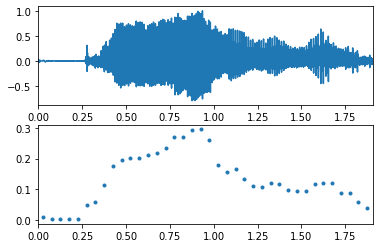

In [8]:
amp = []
for frame in frames:                      # 점이 38개, 각 frame(윈도우)의 값을 받음
  amp.append(np.sqrt(np.mean(frame**2)))  # 값을 제곱하고 평균을 내서 루트를 씌움, amp에 총 38개의 숫자가 들어감

plt.subplot(2,1,1)
plt.plot(t, s)
plt.xlim([0, t[-1]])
plt.subplot(2,1,2)
plt.plot(framesT, amp, '.')
plt.xlim([0, t[-1]])
plt.show()